In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/winemag-data_first150k.csv')
df['rating_binary'] = (df['points'] >= 90).astype(int)

target_total_rows = 3000 #Number of samples needed in new dataset
target_class_rows = target_total_rows // 2

df_balanced = pd.DataFrame()

df_minority = df[df['rating_binary'] == 1]
df_minority_sample = df_minority.sample(n=min(target_class_rows, len(df_minority)), random_state=42)
df_balanced = pd.concat([df_balanced, df_minority_sample])

df_majority = df[df['rating_binary'] == 0]
df_majority_sample = df_majority.sample(n=min(target_class_rows, len(df_majority)), random_state=42)
df_balanced = pd.concat([df_balanced, df_majority_sample])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

new_class_dist = df_balanced['rating_binary'].value_counts(normalize=True)
print("\nBalanced Class Distribution:")
print(new_class_dist)

print(f"\nBalanced Dataset Size: {len(df_balanced)}")

df_balanced.to_csv('wine_small_balanced.csv', index=False)


Balanced Class Distribution:
rating_binary
0    0.5
1    0.5
Name: proportion, dtype: float64

Balanced Dataset Size: 3000


Dataset Shape: (3000, 2)

Class Distribution:
Liked
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Pooling Strategy: cls ---


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]


Model Evaluation:
Training Accuracy: 0.5
Validation Accuracy: 0.5
Test Accuracy: 0.5

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       150

    accuracy                           0.50       300
   macro avg       0.25      0.50      0.33       300
weighted avg       0.25      0.50      0.33       300


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       300
           1       0.00      0.00      0.00       300

    accuracy                           0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



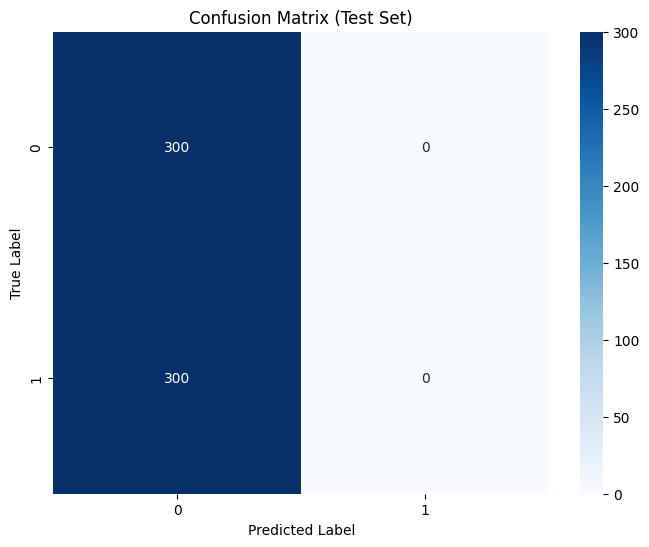


Example Predictions:

Review: An excellent wine with great balance and complexity. Rich flavors of dark fruit and oak.
Prediction: Not Liked
Probability: Positive=0.472, Negative=0.528

Review: Simple and straightforward. Somewhat bland with little character.
Prediction: Not Liked
Probability: Positive=0.451, Negative=0.549

Review: Amazing depth with perfect tannins. A masterpiece of winemaking.
Prediction: Not Liked
Probability: Positive=0.456, Negative=0.544
